In [46]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import json
from pprint import pprint

# Resource File (CSV)
five_cities = pd.read_csv("output_data/Top_100.csv")
five_cities.head()

,Unnamed: 0,Restaurant_id,Name,Locality,Address,City,Latitude,Longitude,Price Range,Average Cost for two,User Rating,Rating Text,Votes,all_reviews_count,Cuisines
0,0,16572612,Vue de monde,CBD,"Level 55, Rialto, 525 Collins Street, CBD, Mel...",Melbourne,-37.818954,144.957934,4,600,4.9,Excellent,3225,987,"Australian, Contemporary"
1,1,16585905,Tipo 00,CBD,"361 Little Bourke Street, CBD, Melbourne",Melbourne,-37.813528,144.961973,4,150,4.9,Excellent,1927,717,Italian
2,2,17881527,Dexter,Preston,"456 High Street, Preston, Melbourne",Melbourne,-37.736196,145.004456,4,110,4.9,Excellent,1475,685,"American, BBQ"
3,3,16558798,Quay,Circular Quay,"Upper Level, Overseas Passenger Terminal 5 Hic...",Sydney,-33.858029,151.209970,4,500,4.9,Excellent,1366,454,Modern Australian
4,4,16559171,Tetsuya's,CBD,"529 Kent Street, CBD, Sydney",Sydney,-33.875143,151.204932,4,440,4.9,Excellent,1235,329,Japanese


In [50]:
#Reorganising columns so Cuisine is at the end of the dataframe - dropping unnamed.
new_df = five_cities[['Restaurant_id',"Name", "Locality", "Address", "City", "Latitude", "Longitude", "Price Range", 
                      "Average Cost for two", "User Rating", "Rating Text", "Votes", "Cuisines"]]
new_df

,Restaurant_id,Name,Locality,Address,City,Latitude,Longitude,Price Range,Average Cost for two,User Rating,Rating Text,Votes,Cuisines
0,16572612,Vue de monde,CBD,"Level 55, Rialto, 525 Collins Street, CBD, Mel...",Melbourne,-37.818954,144.957934,4,600,4.9,Excellent,3225,"Australian, Contemporary"
1,16585905,Tipo 00,CBD,"361 Little Bourke Street, CBD, Melbourne",Melbourne,-37.813528,144.961973,4,150,4.9,Excellent,1927,Italian
2,17881527,Dexter,Preston,"456 High Street, Preston, Melbourne",Melbourne,-37.736196,145.004456,4,110,4.9,Excellent,1475,"American, BBQ"
3,16558798,Quay,Circular Quay,"Upper Level, Overseas Passenger Terminal 5 Hic...",Sydney,-33.858029,151.209970,4,500,4.9,Excellent,1366,Modern Australian
4,16559171,Tetsuya's,CBD,"529 Kent Street, CBD, Sydney",Sydney,-33.875143,151.204932,4,440,4.9,Excellent,1235,Japanese
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,16590137,Zum Kaiser,Woolloongabba,"416 Vulture Street, Woolloongabba, Brisbane",Brisbane,-27.484477,153.036863,3,60,4.7,Excellent,296,German
96,16561357,Ormeggio At The Spit,"D'Albora Marinas, Mosman","D'Albora Marinas The Spit, Spit Road, Mosman, ...",Sydney,-33.804225,151.245839,4,300,4.7,Excellent,286,Italian
97,16574463,Katik Take Away Food,Campbellfield,"349 Barry Road, Campbellfield, Melbourne, VIC",Melbourne,-37.666874,144.948233,2,40,4.7,Excellent,284,"Middle Eastern, Turkish"
98,16589254,127 Days,Croydon Park,"127 Days Road, Croydon Park, Adelaide",Adelaide,-34.875846,138.566375,2,50,4.7,Excellent,267,"American, Burger, Sandwich"


In [51]:
#Separating Cuisines data by comma and placing the data into new columns
df = pd.concat([new_df, new_df['Cuisines'].str.split(', ', expand=True)], axis=1)
df.columns = ['Restaurant_id',"Name", "Locality", "Address", "City", "Latitude", "Longitude", "Price Range", 
                      "Average Cost for two", "User Rating", "Rating Text", "Votes", "Cuisines", "Cuisine_1","Cuisine_2","Cuisine_3","Cuisine_4","Cuisine_5"]
df

,Restaurant_id,Name,Locality,Address,City,Latitude,Longitude,Price Range,Average Cost for two,User Rating,Rating Text,Votes,Cuisines,Cuisine_1,Cuisine_2,Cuisine_3,Cuisine_4,Cuisine_5
0,16572612,Vue de monde,CBD,"Level 55, Rialto, 525 Collins Street, CBD, Mel...",Melbourne,-37.818954,144.957934,4,600,4.9,Excellent,3225,"Australian, Contemporary",Australian,Contemporary,None,None,None
1,16585905,Tipo 00,CBD,"361 Little Bourke Street, CBD, Melbourne",Melbourne,-37.813528,144.961973,4,150,4.9,Excellent,1927,Italian,Italian,None,None,None,None
2,17881527,Dexter,Preston,"456 High Street, Preston, Melbourne",Melbourne,-37.736196,145.004456,4,110,4.9,Excellent,1475,"American, BBQ",American,BBQ,None,None,None
3,16558798,Quay,Circular Quay,"Upper Level, Overseas Passenger Terminal 5 Hic...",Sydney,-33.858029,151.209970,4,500,4.9,Excellent,1366,Modern Australian,Modern Australian,None,None,None,None
4,16559171,Tetsuya's,CBD,"529 Kent Street, CBD, Sydney",Sydney,-33.875143,151.204932,4,440,4.9,Excellent,1235,Japanese,Japanese,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,16590137,Zum Kaiser,Woolloongabba,"416 Vulture Street, Woolloongabba, Brisbane",Brisbane,-27.484477,153.036863,3,60,4.7,Excellent,296,German,German,None,None,None,None
96,16561357,Ormeggio At The Spit,"D'Albora Marinas, Mosman","D'Albora Marinas The Spit, Spit Road, Mosman, ...",Sydney,-33.804225,151.245839,4,300,4.7,Excellent,286,Italian,Italian,None,None,None,None
97,16574463,Katik Take Away Food,Campbellfield,"349 Barry Road, Campbellfield, Melbourne, VIC",Melbourne,-37.666874,144.948233,2,40,4.7,Excellent,284,"Middle Eastern, Turkish",Middle Eastern,Turkish,None,None,None
98,16589254,127 Days,Croydon Park,"127 Days Road, Croydon Park, Adelaide",Adelaide,-34.875846,138.566375,2,50,4.7,Excellent,267,"American, Burger, Sandwich",American,Burger,Sandwich,None,None


In [99]:
#Placing Cuisine_1 the main cuisine in a Dataframe to allow grouping
df["Cuisine_1"].value_counts()

Asian                           21
Japanese                        21
Italian                         10
Modern Australian/Australian    10
American/Burger                  8
European/Mediterranean           7
Other                            7
French                           7
Middle Eastern                   6
Coffee and Tea/Desserts          3
Name: Cuisine_1, dtype: int64

In [100]:
# Combining similar cuisines together
df = df.replace({"Sushi": "Japanese", "Japanese BBQ": "Japanese", "Ramen" : "Japanese",
                                    "Pizza": "Italian", 
                                    "Australian": "Modern Australian", 
                                    "European" : "European/Mediterranean", "Mediterranean" : "European/Mediterranean", 
                                    "Greek" : "European/Mediterranean", 
                                    "Spanish/Tapas" : "European/Mediterranean",
                 "Burger" : "American/Burger", "American": "American/Burger", "Korean":"Asian", "Malaysian":"Asian", 
                 "Korean BBQ":"Asian", "Asian Fusion": "Asian",  "Thai": "Asian", "Vietnamese":"Asian", "German":"European/Mediterranean",
                 "Chinese": "Asian", "Modern European":"European/Mediterranean", "Fast Food":"American/Burger", "Taiwanese":"Asian",
                 "Hawaiian": "American/Burger", "Coffee and Tea": "Coffee and Tea/Desserts", "Desserts":"Coffee and Tea/Desserts", 
                 "Bar Food" : "Other", "Bakery" : "Other", "Vegetarian":"Other" , "Indian": "Asian", "African":"Other", 
                 "Steak":"Other", "Seafood":"Other"        })

df["Cuisine_1"].value_counts()

Asian                           21
Japanese                        21
Italian                         10
Modern Australian/Australian    10
American/Burger                  8
European/Mediterranean           7
Other                            7
French                           7
Middle Eastern                   6
Coffee and Tea/Desserts          3
Name: Cuisine_1, dtype: int64

In [96]:
cuisines = pd.DataFrame(df["Cuisine_1"].value_counts())
cuisines

,Cuisine_1
Asian,21
Japanese,21
Italian,10
Modern Australian/Australian,10
American/Burger,8
European/Mediterranean,7
Other,7
French,7
Middle Eastern,6
Coffee and Tea/Desserts,3


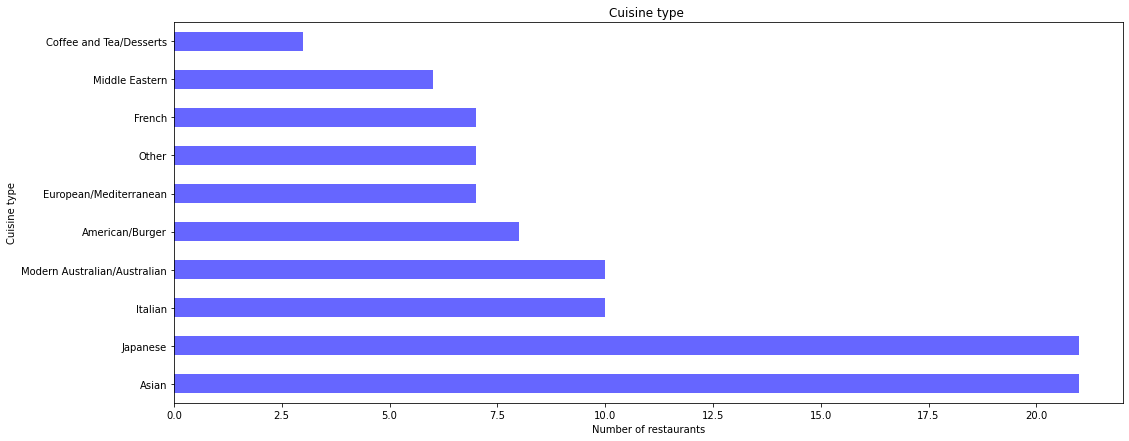

<Figure size 432x288 with 0 Axes>

In [101]:
cuisines.plot(kind="barh", facecolor="blue", alpha=0.6, figsize=(17,7), legend = None)
# Set textual properties
plt.title("Cuisine type ")
plt.ylabel("Cuisine type")
plt.xlabel("Number of restaurants")
plt.ylim(-0.5,len(cuisines)-0.5)
plt.xlim(0,max(cuisines["Cuisine_1"])+1)
#Save image
plt.savefig('images/Cuisine type - Top 100 restaurants.png')
# Show plot
plt.show()
plt.tight_layout()

In [98]:
city_group = df.groupby("City")
cuisine_city = pd.DataFrame(city_group["Cuisine_1"].value_counts())
cuisine_city

Cuisine_1
City      Cuisine_1                              
Adelaide  Asian                                 3
          American/Burger                       1
          European/Mediterranean                1
          Italian                               1
          Middle Eastern                        1
          Modern Australian/Australian          1
Brisbane  American/Burger                       2
          Japanese                              2
          Asian                                 1
          European/Mediterranean                1
          French                                1
          Italian                               1
          Middle Eastern                        1
          Modern Australian/Australian          1
Melbourne Asian                                11
          Japanese                              9
          Other                                 6
          European/Mediterranean                4
          Middle Eastern                        4
          Modern Australian/Australian          4
          Italian                               3
          French                                2
          American/Burger                       1
Perth     Japanese                              5
          American/Burger                       2
          Italian                               2
          Coffee and Tea/Desserts               1
          European/Mediterranean                1
          French                                1
Sydney    Asian                                 6
          Japanese                              5
          Modern Australian/Australian          4
          French                                3
          Italian                               3
          American/Burger                       2
          Coffee and Tea/Desserts               2
          Other                                 1